# Setup

In [270]:
# importing
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [271]:
# loading the data
df = pd.read_csv('churn_bank.csv')

NRows, NColumns = df.shape

columnNames = list(df.columns)

In [272]:
# Creating two additional datasets for comparison
dfStayed = df.loc[df['Exited']==1]
dfExited = df.loc[df['Exited']==0]

# General Analysis

### Calculating the differences in summary statistics

In [273]:
#pip install tabulate
from tabulate import tabulate

In [274]:
## calculating the differences in summary statistics
columnNamesDescribe = list(df.columns.drop(['Surname', 'Geography', 'Gender']))
columns2keep = ['CreditScore','Age','Tenure','Balance','EstimatedSalary']
columns2Drop = [val for val in columnNamesDescribe if val not in columns2keep]

differences_in_trends = np.array(dfExited.describe().T.drop(columns2Drop)) - np.array(dfStayed.describe().T.drop(columns2Drop))
#differences_in_trends = (np.array(dfExited.describe().T.drop(columns2Drop)) - np.array(dfStayed.describe().T.drop(columns2Drop)))/np.array(dfStayed.describe().T.drop(columns2Drop))
#len(columnNames)-len(differences_in_trends)
differences_in_trends = pd.DataFrame(differences_in_trends).set_index(pd.Index(columns2keep))

headers=['variable', 'count','mean', 'std', 'min', '25%', '50%', '75%', 'max']
table = [pd.DataFrame(columns2keep), pd.DataFrame(differences_in_trends)]
print(tabulate(differences_in_trends, headers))

variable           count           mean           std    min        25%       50%       75%        max
---------------  -------  -------------  ------------  -----  ---------  --------  --------  ---------
CreditScore         5926       6.5017      -4.66767    55          7          7        2          0
Age                 5926      -7.42961      0.363801    0         -7         -9      -10          8
Tenure              5926       0.100535    -0.0554485   0          1          0       -1          0
Balance             5926  -18363.2       4487.25        0     -38340     -17276.6  -5023.05  -29365.3
EstimatedSalary     5926   -1727.29      -506.831      78.49   -1124.23   -2815.8  -3812.95     184.38


* Credit Score: no big difference between exited and stayed, except that it seems the min value of those who exited is higher.
* Age: those who exit are on average 7 years younger.
* tenure: Those who exit seem to have been clients of the bank for a bit longer, but not a significative amount of time in average.
* Balance: Those who exit seem to have a smaller average balance (of almost 19000).
* EstmatedSalary: those who exit have a slightly smaller salary but nothing huge/significative.

### Making dictionaries for the general descriptions

In [275]:
# creating a dictionary for all types
types_df = df.dtypes.to_frame(name="type")

types = {}
for i in range(0, 13):
    types[columnNames[i]] = types_df.iloc[i, 0].type

In [276]:
# creating a dictionary for all mins, means, maxs, ...
df_describe = df.describe().T

mins_df = df_describe.loc[:,"min"]
maxs_df = df_describe.loc[:,"max"]
means_df = df_describe.loc[:,"mean"]
median_df = df_describe.loc[:,"50%"]
std_df = df_describe.loc[:,"std"]

mins = {}
means = {}
maxs = {}
medians = {}
stds = {}

for i in range(len(df_describe)):
    key = columnNamesDescribe[i]
    mins[key] = mins_df.iloc[i]
    maxs[key] = maxs_df.iloc[i]
    means[key] = means_df.iloc[i]
    medians[key] = median_df.iloc[i]
    stds[key] = std_df.iloc[i]
    

# Individual distribution of variables

To try to identify the main factors contributing to customer churn we will first proceed by making a general review of the variables we are working with, their distributions and trends. This will give us more perspective over the dataset, which will allow us to decide how to treat this database to find the causes of churn amongst the bank's clients and to interpret the results. 

The dataset is composed of the following variables: our categorical variables are Geography, Gender, HasCrCard, IsActiveMember, Exited; and the quantitative variables are CreditScore, Age, Tenure, Balance, NumOfProducts, EstimatedSalary. The variables CustomerId and Surname act as indexes and references to every client but are not relevant to our analysis. 

We will first focus into an exploratory analysis of the variable's individual distributions, section in which we will also introduce and explain each of the variables for a general overview.


We have divided variables into three categories: those indicative of a customer's identity, those pertaining to each customers' finacial information, and finally those relating to a customer's "activity" or behavior with respect to the bank and its products. The former group will help us build a customer profile non relative to their financial situation, which we will afterwards complement with financial information, and analyse if this complete profil is related to the customer's activity status, and more importantly to churn.

### Customer Profile: Gender, Age and Geography

### Gender
Gender is a binary categporical variable that can take 2 values: "Male" and "Female".

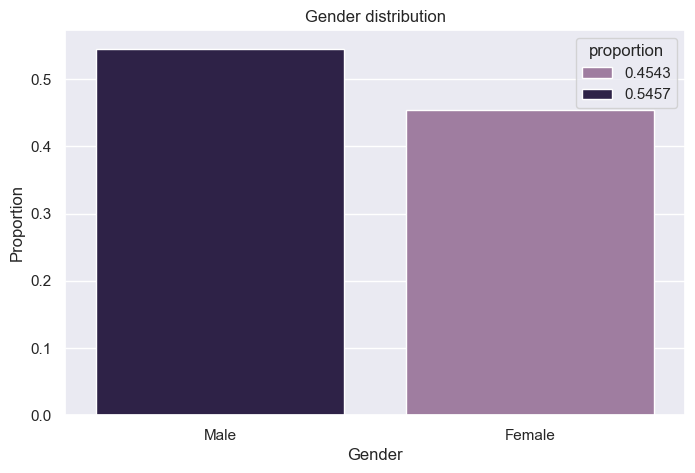

The bank has 4543 female clients (45.43% of the total) and 5457 male clients (54.57%).


In [277]:
# gender
fig, ax = plt.subplots(figsize = (8,5))

gender_palette = ["#a577a6", "#2c1c4d"]

sns.barplot(x = df["Gender"].value_counts().index,
            y = df["Gender"].value_counts(normalize=True), 
            hue=df["Gender"].value_counts(normalize=True),
            palette=sns.color_palette(gender_palette)
)
sns.set_theme(style="darkgrid")
ax.set(
    title = "Gender distribution",
    xlabel = "Gender",
    ylabel = "Proportion"
)
plt.show()

message = "The bank has {} female clients ({}% of the total) and {} male clients ({}%).".format(
    df["Gender"].value_counts().iloc[1],
    df["Gender"].value_counts(normalize=True).mul(100).round(2).iloc[1],
    df["Gender"].value_counts().iloc[0],
    df["Gender"].value_counts(normalize=True).mul(100).round(2).iloc[0]
)
print(message)

### Age

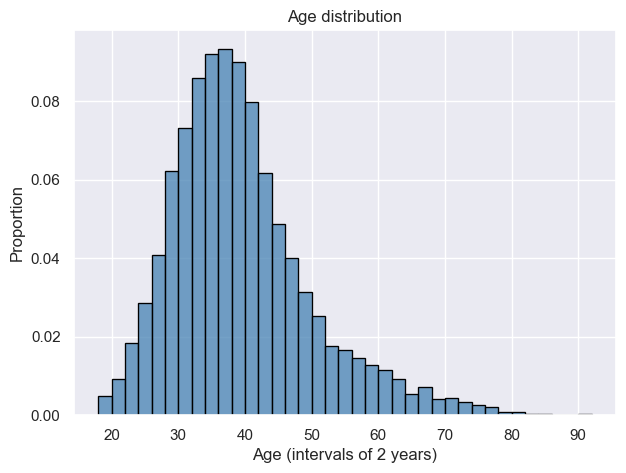

The bank's clients are between 18 and 92 years old, with the median age being 37.0 and a standard deviation of 10.49 years.


In [278]:
# Age
fig, ax = plt.subplots(figsize=[7, 5])

sns.histplot(
    x = df["Age"],
    stat='probability',
    binwidth = 2,
    color="steelblue",
    edgecolor = "black",
)

ax.set(
    title = "Age distribution",
    xlabel = "Age (intervals of 2 years)",
    ylabel = "Proportion"
)
sns.set_theme(style="darkgrid")
plt.show()

message = "The bank's clients are between {} and {} years old, with the median age being {} and a standard deviation of {} years.".format(
    int(mins["Age"]), int(maxs["Age"]),
    round(medians["Age"], 2), round(stds["Age"], 2)
)
print(message)

### Geography
The Geography variable represents in which country the customer of this international bank lives. The bank has three different branches: in France, in Germany and in Spain.

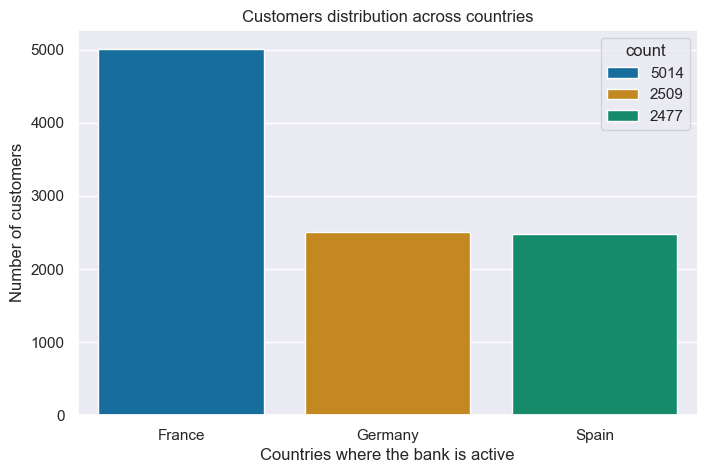

The bank's clients are majoritarily from France (50.14 percent),
followed closely by Germany and Spain (25.09 and 24.77 percent of the total respectively).


In [279]:
# Geography
fig, ax = plt.subplots(figsize = (8,5))
sns.barplot(x = df["Geography"].value_counts().index,
            y = df["Geography"].value_counts(),
            hue=df["Geography"].value_counts(),
            hue_order = df["Geography"].value_counts(),
            palette=sns.color_palette("colorblind", 3)
            )

sns.set_theme(style="darkgrid")

ax.set(
    title = "Customers distribution across countries",
    xlabel = "Countries where the bank is active",
    ylabel = "Number of customers"
)
plt.show()

message = "The bank's clients are majoritarily from France ({} percent),\nfollowed closely by Germany and Spain ({} and {} percent of the total respectively).".format(
    df["Geography"].value_counts(normalize=True).mul(100).round(2).iloc[0],
    df["Geography"].value_counts(normalize=True).mul(100).round(2).iloc[1],
    df["Geography"].value_counts(normalize=True).mul(100).round(2).iloc[2]
)
print(message)

The results lead us to speculate that the bank might be Frenchin origin, and later expanded to offer its services in Germany and Spain, since the number of customers in these two countries is much slower. Additionally, the bank might be facing some competition in the German and Spanish markets. 

It is interesting to see if the age profile in customers in each country provides insight into our theory. For example, a younger age distribution in Germany and Spain than in France could indicate a higher penetration of the bank's services in the two branches amongst young customers who do not have an established bank acocunt yet. However, we do not observe any major differences in age distribution in the three countries. 

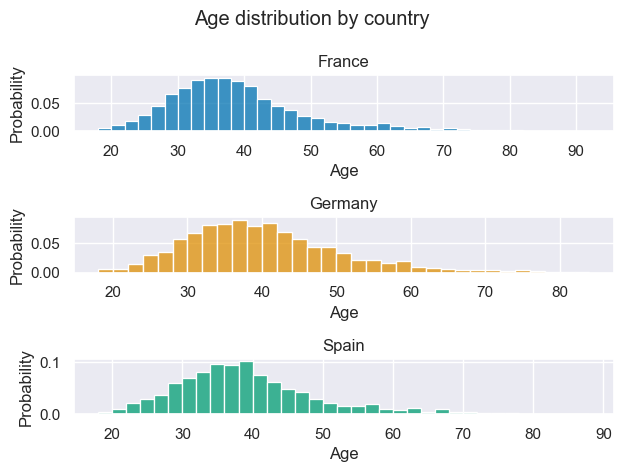

In [280]:
# Age and geography
fig, ax = plt.subplots(3, 1)

for i in range (0,3):
    country = df["Geography"].value_counts().index[i]
    ax[i].set_title(country)

    this_df = df[df["Geography"] == country]

    sns.histplot(
        x = this_df["Age"],
        stat='probability',
        color=sns.color_palette("colorblind")[i],
        binwidth = 2,
        ax=ax[i]
    )

sns.set_theme(style="darkgrid")
fig.suptitle('Age distribution by country')
fig.tight_layout()
plt.show()

### Customer Description: Financial Analysis

### Credit Score 
Credit score is a number from 300 to 850 that rates a consumer's creditworthiness. It represents a customer's credit history and your ability to pay your loans and financial obligations. In particular, the FICO score divides credit score into different intervals to simplify the interpretation of the score according to each customer. 

![image.png](https://www.simmonsbank.com/siteassets/content-hub/learning-center/credit-score-image.jpg)



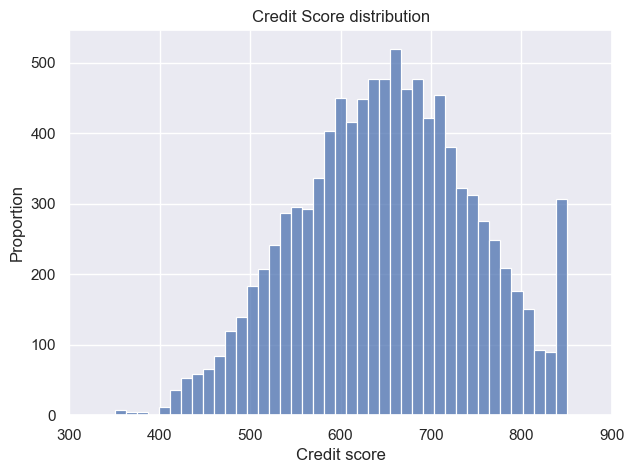

The average credit score is around 650.5288, with a standard deviation of 96.65 points.
We observe an interesting peak in the proportion of people who have a credit score around 850.


In [281]:
# Credit Score
fig, ax = plt.subplots(figsize=[7, 5])

sns.histplot(
    x = df["CreditScore"]
)
plt.xlim([300, 900]) 

ax.set(
    title = "Credit Score distribution",
    xlabel = "Credit score",
    ylabel = "Proportion"
)
plt.show()

message = "The average credit score is around {}, with a standard deviation of {} points.\nWe observe an interesting peak in the proportion of people who have a credit score around 850.".format(
    means["CreditScore"],
    round(stds["CreditScore"], 2)
)
print(message)

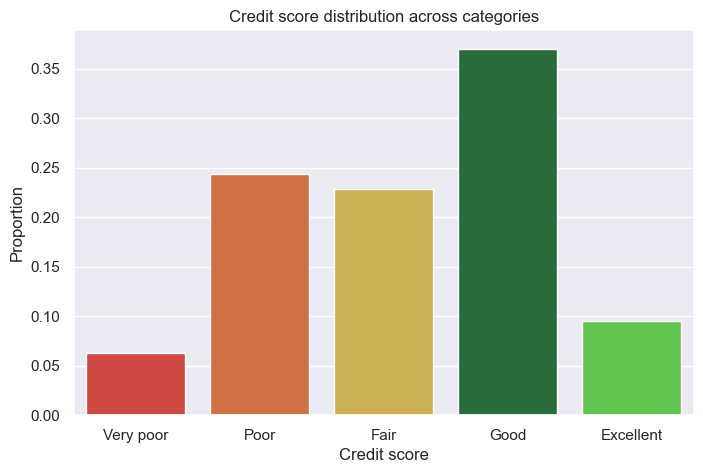

Most clients' credit scores in this bank between 'poor' and 'fair',
with 'good' being the most common and very few scoring 'excellent' or 'very poor' credit.


In [282]:
# Categorical Credit Score
conditions = [
    (df['CreditScore'] <= 499),
    ((df['CreditScore'] > 499) & (df['CreditScore'] <= 600)),
    ((df['CreditScore'] > 600) & (df['CreditScore'] <= 660)),
    ((df['CreditScore'] > 660) & (df['CreditScore'] <= 780)),
    (df['CreditScore'] > 780)
    ]
values = ['Very poor', 'Poor', 'Fair', 'Good', 'Excellent']

colors_CreditScore = ["#e6332e", "#e6682e", "#e0bb3f", "#1e7837", "#55d93b"]

df["CreditScoreCategory"] = np.select(conditions, values, default=df["CreditScore"])
fig, ax = plt.subplots(figsize = (8,5))
sns.barplot(x = df["CreditScoreCategory"].value_counts().index,
            y = df["CreditScoreCategory"].value_counts(normalize=True),
            order=values,
            hue = df["CreditScoreCategory"].value_counts().index,
            hue_order = values,
            palette=sns.color_palette(colors_CreditScore)
            )

ax.set(
    title = "Credit score distribution across categories",
    xlabel = "Credit score",
    ylabel = "Proportion"
)
plt.show()

message = "Most clients' credit scores in this bank between 'poor' and 'fair',\nwith 'good' being the most common and very few scoring 'excellent' or 'very poor' credit."
print(message)

### Balance


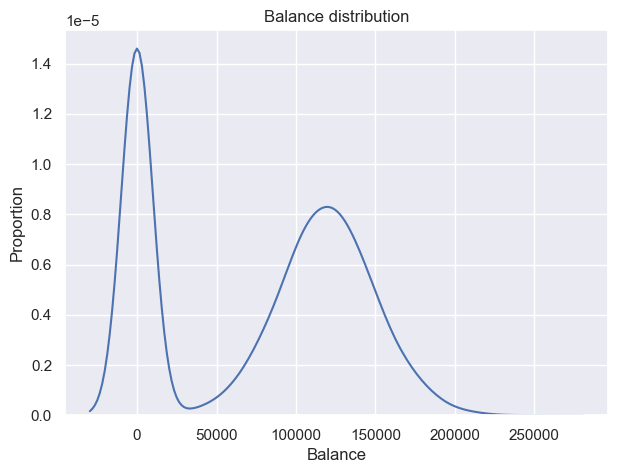

The average balance is of 76485.89€ and the median is of 97198.54€.
This is because the proportion of people whose balance is at 0 is considerable: 36.17 percent.


In [283]:
# Balance
fig, ax = plt.subplots(figsize=[7, 5])

sns.kdeplot(
    x = df["Balance"],#.value_counts()), 
    #y = df_exited["Age"].value_counts(normalize=True),
)
ax.set(
    title = "Balance distribution",
    xlabel = "Balance",
    ylabel = "Proportion"
)
plt.show()


message = "The average balance is of {}€ and the median is of {}€.\nThis is because the proportion of people whose balance is at 0 is considerable: {} percent.".format(
    round(means["Balance"],2),
    round(medians["Balance"],2),
    round((len(df.query("Balance == 0"))/NRows)*100,2)
)
print(message)

In [284]:
print(f"The percentage of people in the bank with a 0 balance is {100*len(df[df['Balance'] == 0])/NRows}.")

The percentage of people in the bank with a 0 balance is 36.17.


### Estimated Salary

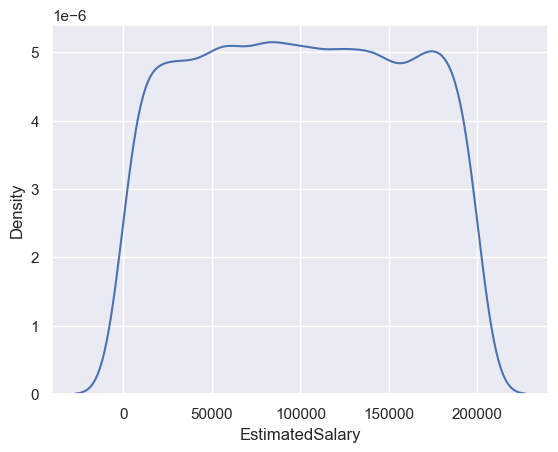

The average estimated salary is of 100090.24€ and the median is of 100193.92€.
It is interesting to note that we observe a very uniform distribution across all values, with a slight peak at the end of the distribution.


In [285]:
# Estimated Salary

sns.kdeplot(
    x = df["EstimatedSalary"],#.value_counts()), 
    #y = df_exited["Age"].value_counts(normalize=True)
)
ax.set(
    title = "Estimated salary distribution",
    xlabel = "Estimated salary",
    ylabel = "Proportion"
)
plt.show()

message = "The average estimated salary is of {}€ and the median is of {}€.\nIt is interesting to note that we observe a very uniform distribution across all values, with a slight peak at the end of the distribution.".format(
    round(means["EstimatedSalary"],2),
    round(medians["EstimatedSalary"],2)
)

print(message)

People all over the distribution of salary seem to be clients of this bank. However, it is very interesting to note the disparity between this result and the very skewed distribution in balance. 

If we group people having a very low balance, around zero, and those having a higher balance, we do not actually see any difference in the estimated salary distributions of the two groups. This implies that there seems to be an important element outside of estimated salary that will affect balance and which we fail to observe.

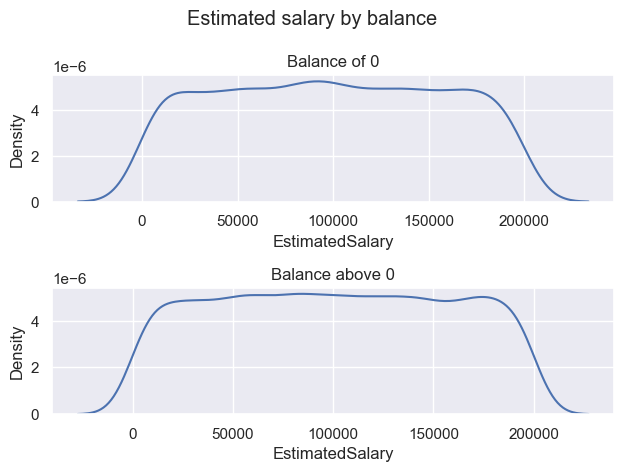

In [286]:
# Estimated Salary and balance
balance_differences = [df[df['Balance'] == 0], df[df['Balance'] != 50000]]
balance_types = ["Balance of 0", "Balance above 0"]

fig, ax = plt.subplots(2, 1)
for i in range(2):
     
    dataframe = balance_differences[i]

    ax[i].set_title(balance_types[i])
    sns.kdeplot(
    x = dataframe["EstimatedSalary"],ax=ax[i]
)

sns.set_theme(style="darkgrid")
fig.suptitle('Estimated salary by balance')
fig.tight_layout()
plt.show()

In summary, the financial analysis of our customers show us 3 main things. One, that the customers' credit score seems to evenly spread out around what is consider as a "fair" average credit score, with a peak in numbers of people with excellent credit scores. Two, that estimated salary is very evenly distributed amongst the banks customers. Three, that balance shows a highly skewed distribution, with 36.17 of people having a balance of 0. 

### Customer Analysis: Activity

### Number of bank products purchased by the customers

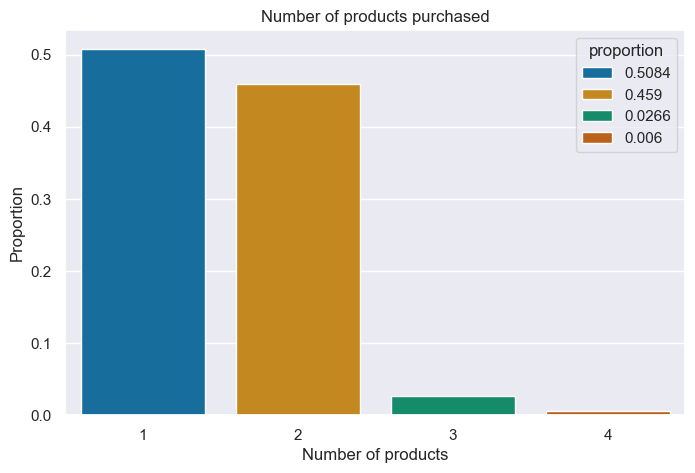

Observing the number of products the customer contracted with the bank, we can see customers have bought at least 1 product.
This product might need to be necessary to be classified as a bank cutsomer because no customer has bought no products.
This product could tus be a bank account. 
Almost half have bought 2, and under 5 percent have bought more.
However, we have to be careful when comparing all groups amongst eachother,
since the sizes of people having purchased 3 and 4 products are too small: 
266 and 60 compared to 5084 and 4590 for 1 and 2 prodcts purchased respectively.


In [287]:
#Number of Products
fig, ax = plt.subplots(figsize = (8,5))
sns.barplot(x = df["NumOfProducts"].value_counts().index,
            y = df["NumOfProducts"].value_counts(normalize=True),
            hue = df["NumOfProducts"].value_counts(normalize=True),
            hue_order = df["NumOfProducts"].value_counts(normalize=True),
            palette = sns.color_palette("colorblind", 4)
            )

ax.set(
    title = "Number of products purchased",
    xlabel = "Number of products",
    ylabel = "Proportion"
)

plt.show()
message = "Observing the number of products the customer contracted with the bank, we can see customers have bought at least 1 product.\nThis product might need to be necessary to be classified as a bank cutsomer because no customer has bought no products.\nThis product could tus be a bank account. \nAlmost half have bought 2, and under 5 percent have bought more.\nHowever, we have to be careful when comparing all groups amongst eachother,\nsince the sizes of people having purchased 3 and 4 products are too small: \n{} and {} compared to {} and {} for 1 and 2 prodcts purchased respectively.".format(
    len(df.query("NumOfProducts == 3")),
    len(df.query("NumOfProducts == 4")),
    len(df.query("NumOfProducts == 1")),
    len(df.query("NumOfProducts == 2"))
)
print(message)

### Having a Credit Card
We observe that 70% of the bank's customers have a credit card. 

/var/folders/cr/71dt26rx1ljbqzzzxpwv5g6r0000gn/T/ipykernel_31562/2533314094.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(("No", "Yes"))


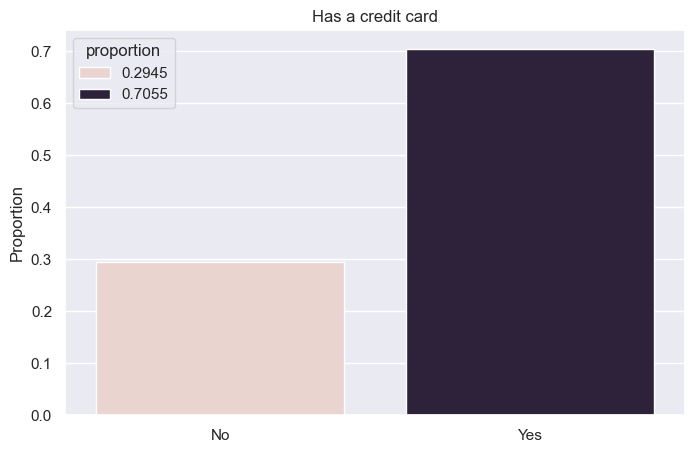

In [288]:
# Has credit card
fig, ax = plt.subplots(figsize = (8,5))
sns.barplot(
            x = df["HasCrCard"].value_counts().index,
            y = df["HasCrCard"].value_counts(normalize=True),
            hue=df["HasCrCard"].value_counts(normalize=True),
            )
ax.set_xticklabels(("No", "Yes"))
ax.set(
    title = "Has a credit card",
    xlabel = " ",
    ylabel = "Proportion"
)
plt.show()

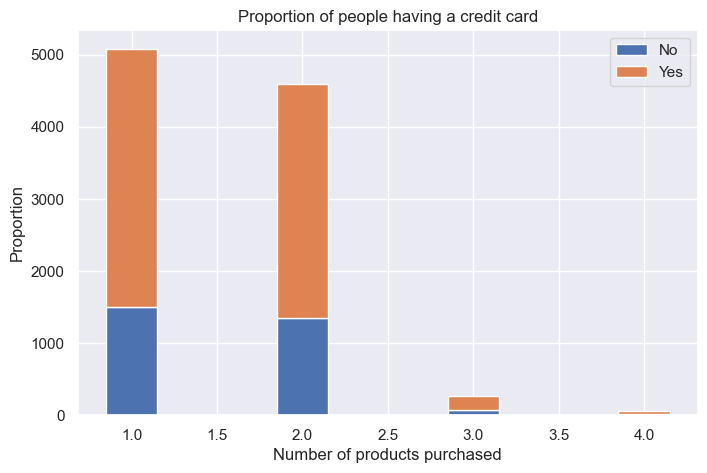

However, we also observe that not all people who have purchased two products have a credit card, so a credit card cannot be the second product.


In [289]:
# Is product 2 credit card and product 1 bank account?
df_prod_crcard = (df
      .groupby("NumOfProducts")["HasCrCard"]
      .value_counts()
      #.mul()
      .round(2)
      .unstack())

fig, ax = plt.subplots(figsize = (8,5))

ax.bar(df_prod_crcard.index, df_prod_crcard[0], label = 'No', width = 0.3) 
ax.bar(df_prod_crcard.index, df_prod_crcard[1], bottom = df_prod_crcard[0], label='Yes', width = 0.3)

ax.set(
    title = "Proportion of people having a credit card",
    xlabel = "Number of products purchased",
    ylabel = "Proportion"
)
ax.legend()
plt.show()

message = "However, we also observe that not all people who have purchased two products have a credit card, so a credit card cannot be the second product."
print(message)

### Being an active member
The bank defines an active customer as someone that has been recently active, for example who has made transactions, as oposed to those who haven't. The definition of how we measure "recently" as well as activity is not very detailed. 

We observe that the proportions of active and non active members are almost (worriyngly?) equal, as almost 50% of the customers have not been recently active, but it is hard to interpret the implications as we lack the details of the definition. 

/var/folders/cr/71dt26rx1ljbqzzzxpwv5g6r0000gn/T/ipykernel_31562/168884204.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Not recently active", "Recently active"])


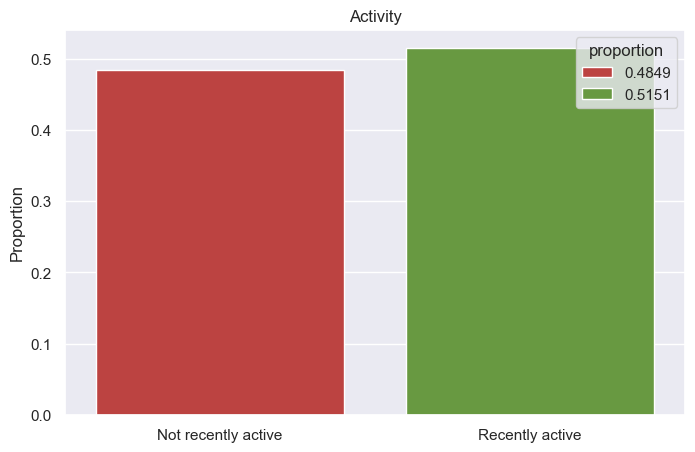

In [290]:
# Is an active member
fig, ax = plt.subplots(figsize = (8,5))
colors = ["#d12f2c","#66a832"]
sns.barplot(
            x = df["IsActiveMember"].value_counts().index,
            y = df["IsActiveMember"].value_counts(normalize=True),
            hue=df["IsActiveMember"].value_counts(normalize=True), 
            palette = sns.color_palette(colors)
            )
ax.set_xticklabels(["Not recently active", "Recently active"])

sns.set_theme(style="darkgrid")
ax.set(
    title = "Activity",
    xlabel = "",
    ylabel = "Proportion"
)
plt.show()

### Tenure
Tenure is the number of years the customer has been a client of the bank. We can see a very even distribution of the amount of years the banks' customers have been their client for, with the exception of people who have been with the bank for ten years, which is a smaller sample. This seems to hint that the bank was created 10 years ago. 

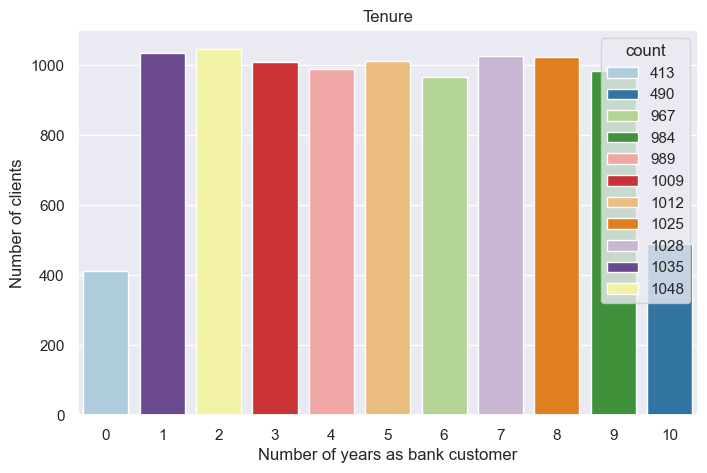

There is a uniform repartition of the amount of years the customers have been with this bank,
expect for those that have been with it for 10 years or are newcomers.
The bank is possibly 10 years old?


In [291]:
# Tenure
fig, ax = plt.subplots(figsize=[8, 5])

sns.barplot(
    x = df["Tenure"].value_counts().index, 
    y = df["Tenure"].value_counts(),
    hue = df["Tenure"].value_counts(),
    #hue_order = df["Tenure"].index,
    palette = sns.color_palette("Paired",11)
)
ax.set(
    title = "Tenure",
    xlabel = "Number of years as bank customer",
    ylabel = "Number of clients"
)

plt.show()

message = "There is a uniform repartition of the amount of years the customers have been with this bank,\nexpect for those that have been with it for 10 years or are newcomers.\nThe bank is possibly 10 years old?"
print(message)


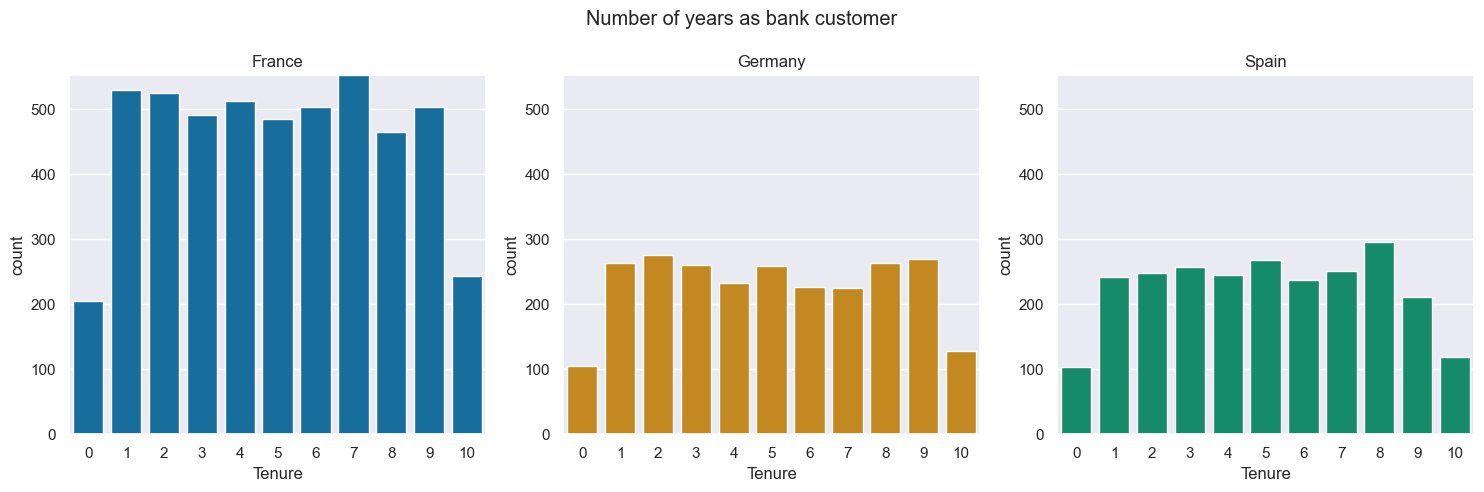

In [292]:
# Tenure and geography
country_differences = [df[df['Geography'] == "France"], df[df['Geography'] == "Germany"], df[df['Geography'] == "Spain"]]
country_types = ["France", "Germany", "Spain"]

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
colors = sns.color_palette("colorblind", 3)
max_count = max([dataframe["Tenure"].value_counts().max() for dataframe in country_differences])

for i in range(3):
    dataframe = country_differences[i]
    ax[i].set_title(country_types[i])
    ax[i].set_ylim(0, max_count)

    sns.barplot(
        x = dataframe["Tenure"].value_counts().index, 
        y = dataframe["Tenure"].value_counts(), 
        ax = ax[i], 
        color=colors[i]
        )
    fig.suptitle('Number of years as bank customer')

fig.tight_layout()
plt.show()

We observe that there are customers from all the countries in which the bank is active that all started at what we assume is the date of creation of the bank, 10 years ago. This means that the bank did not later expand to Germany and Spain as was we previously hypothesized. However, we still observe a lesser number of customers in thesse 2 countries across the years, which might be telling on a higher degree of competition in these countries.

### Exited
This is our main variable of interest, which we will be studying and trying to predict. It is a binary variable that takes two values: 0 and 1 if that person has exited the bank. For the continuation of our analysis we will use the words 'Stayed' and 'Exited'. 

/var/folders/cr/71dt26rx1ljbqzzzxpwv5g6r0000gn/T/ipykernel_31562/2407075058.py:3: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.barplot(
/var/folders/cr/71dt26rx1ljbqzzzxpwv5g6r0000gn/T/ipykernel_31562/2407075058.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Stayed", "Exited"])


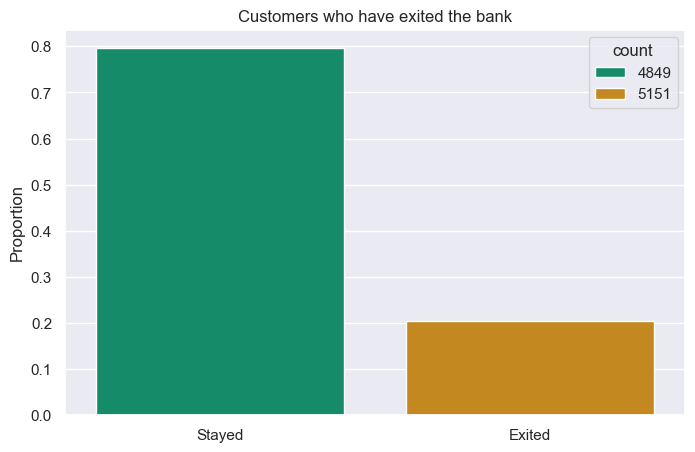

Around 20 percent of customers have exited the bank. This is  a high number which the bank wishes to reduce.


In [293]:
# Exited
fig, ax = plt.subplots(figsize = (8,5))
sns.barplot(
            x = df["Exited"].value_counts().index,
            y = df["Exited"].value_counts(normalize=True),
            hue=df["IsActiveMember"].value_counts(), 
            palette = sns.color_palette(list(reversed(colors)))
            )

ax.set(
    title = "Customers who have exited the bank",
    xlabel = "",
    ylabel = "Proportion"
)
ax.set_xticklabels(["Stayed", "Exited"])

plt.show()
message="Around 20 percent of customers have exited the bank. This is  a high number which the bank wishes to reduce."
print(message)

# How do the different variables interact with each other? 
We now will look more in deopth at the interaction of the variables amonsgt eachother, to try and locate additional patterns, trends and interactions that might not have come up in the surface level analysis. 
We will start by observing whether individual charactistics such as gender, ***age** or geography seem to be linked to other variables. 

Then we will examine whether any patterns in activity could be predictors of financial data, and viceversa.

### Correlations with Exited (Second part)

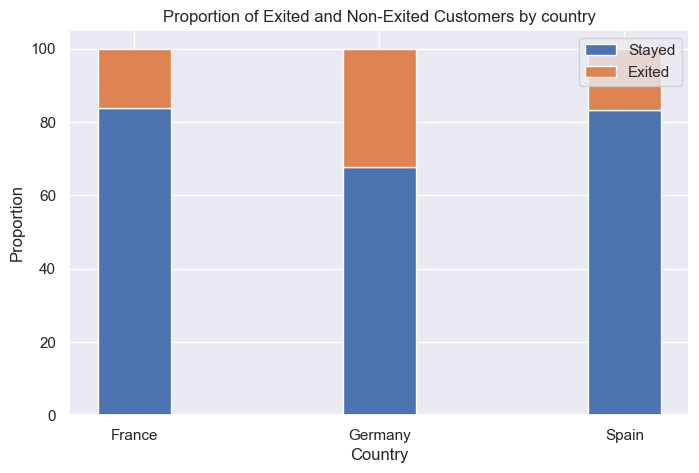

We can see that a higher proportion of people who leave are from Germany.


In [294]:
# Geography, Exited
df_geo_exit = (df
      .groupby("Geography")["Exited"]
      .value_counts(normalize=True)
      .mul(100)
      .round(2)
      .unstack())

fig, ax = plt.subplots(figsize = (8,5))

ax.bar(df_geo_exit.index, df_geo_exit[0], label = 'Stayed', width = 0.3) 
ax.bar(df_geo_exit.index, df_geo_exit[1], bottom = df_geo_exit[0], label='Exited', width = 0.3)

ax.set(
    title = "Proportion of Exited and Non-Exited Customers by country",
    xlabel = "Country",
    ylabel = "Proportion"
)
ax.legend()
plt.show()

message = "We can see that a higher proportion of people who leave are from Germany."
print(message)

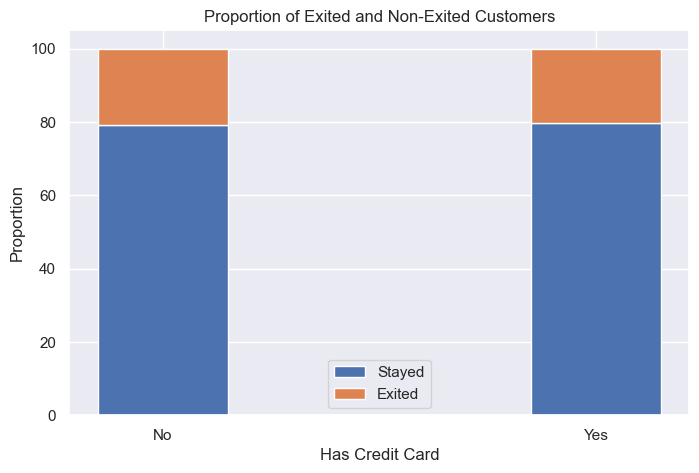

We can see that there is no sognificant difference in leave between people who have and who don't have credit cards.


In [295]:
# HasCreditCard, Exited
df_card_exit = (df
      .groupby("HasCrCard")["Exited"]
      .value_counts(normalize=True)
      .mul(100)
      .round(2)
      .unstack())
#df_card_exit.index = ["False", "True"]


fig, ax = plt.subplots(figsize = (8,5))

ax.bar(df_card_exit.index, df_card_exit[0], label = 'Stayed', tick_label = ["No", "Yes"],  width = 0.3) 
ax.bar(df_card_exit.index, df_card_exit[1], bottom = df_card_exit[0], tick_label = ["No", "Yes"], label='Exited', width = 0.3)

ax.set(
    title = "Proportion of Exited and Non-Exited Customers",
    xlabel = "Has Credit Card",
    ylabel = "Proportion",
)
ax.legend()
plt.show()

message = "We can see that there is no sognificant difference in leave between people who have and who don't have credit cards."
print(message)


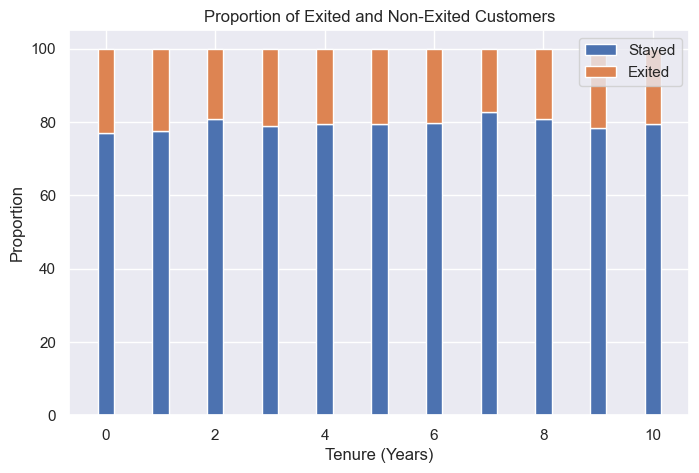

There doesn't seem to be any significant predictor in leaving or staying by the number of years a client has been with the bank.


In [296]:
# Tenure, Exited

df_tenure_exit = (df
      .groupby("Tenure")["Exited"]
      .value_counts(normalize=True)
      .mul(100)
      .round(2)
      .unstack())

fig, ax = plt.subplots(figsize = (8,5))

ax.bar(df_tenure_exit.index, df_tenure_exit[0], label = 'Stayed', width = 0.3) 
ax.bar(df_tenure_exit.index, df_tenure_exit[1], bottom = df_tenure_exit[0], label='Exited', width = 0.3)

ax.set(
    title = "Proportion of Exited and Non-Exited Customers",
    xlabel = "Tenure (Years)",
    ylabel = "Proportion"
)
ax.legend()
plt.show()

message = "There doesn't seem to be any significant predictor in leaving or staying by the number of years a client has been with the bank."
print(message)

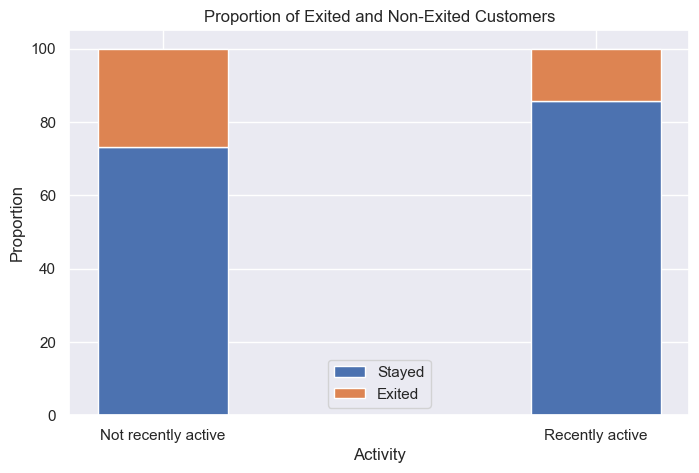

There doesn't seem to be any significant predictor in leaving or staying by the number of years a client has been with the bank.


In [297]:
# Is active member, Exited
df_active_exit = (df
      .groupby("IsActiveMember")["Exited"]
      .value_counts(normalize=True)
      .mul(100)
      .round(2)
      .unstack())

fig, ax = plt.subplots(figsize = (8,5))

ax.bar(df_active_exit.index, df_active_exit[0], label = 'Stayed', tick_label = ["Not recently active", "Recently active"], width = 0.3) 
ax.bar(df_active_exit.index, df_active_exit[1], bottom = df_active_exit[0], label='Exited', width = 0.3)

ax.set(
    title = "Proportion of Exited and Non-Exited Customers",
    xlabel = "Activity",
    ylabel = "Proportion"
)
ax.legend()
plt.show()

message = "There doesn't seem to be any significant predictor in leaving or staying by the number of years a client has been with the bank."
print(message)

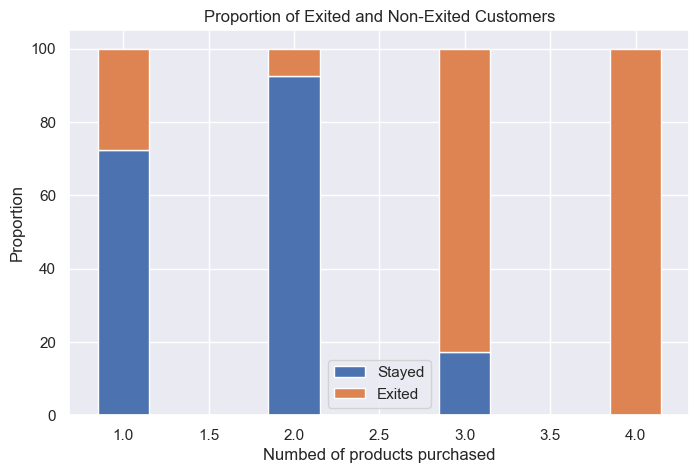

At first sight, there seems to be a link between exiting and purchasing a big number of products.
Particularly, all people who bought 4 products exited. 
However, we have to be careful when comparing because the sizes of people having purchased 3 and 4 products are too small: 
266 and 60 compared to 5084 and 4590 for 1 and 2 prodcts purchased respectively.


In [298]:
# Numbed of products, Exited
df_products_exit = (df
      .groupby("NumOfProducts")["Exited"]
      .value_counts(normalize=True)
      .mul(100)
      .round(2)
      .unstack(fill_value=0))

fig, ax = plt.subplots(figsize = (8,5))

ax.bar(df_products_exit.index, df_products_exit[0], label = 'Stayed', width = 0.3) 
ax.bar(df_products_exit.index, df_products_exit[1], bottom = df_products_exit[0], label='Exited', width = 0.3)

ax.set(
    title = "Proportion of Exited and Non-Exited Customers",
    xlabel = "Numbed of products purchased",
    ylabel = "Proportion"
)
ax.legend()
plt.show()

message = "At first sight, there seems to be a link between exiting and purchasing a big number of products.\nParticularly, all people who bought 4 products exited. \nHowever, we have to be careful when comparing because the sizes of people having purchased 3 and 4 products are too small: \n{} and {} compared to {} and {} for 1 and 2 prodcts purchased respectively.".format(
    len(df.query("NumOfProducts == 3")),
    len(df.query("NumOfProducts == 4")),
    len(df.query("NumOfProducts == 1")),
    len(df.query("NumOfProducts == 2"))
)
print(message)

## Gender

We do not find gender differences to be a predictor of any activity variable (see Annex). 

### Gendered patterns in activity variables (annex)


For Sarah: No activity variable seems to be linked with gender so maybe we can put a small paragraph on latex explaining this and showing these 4 plots but small and in a grid so that we can move on quickly with this?

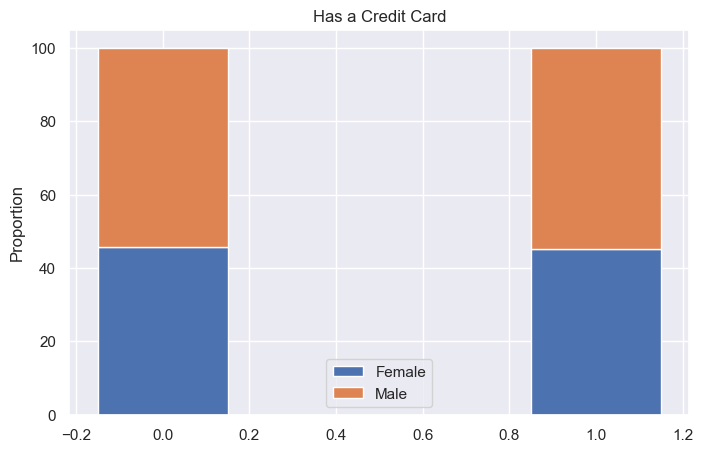

Gender differences don't explain having or not having a credit card.


In [299]:
# HasCreditCard, Gender
df_card_gender = (df
      .groupby("HasCrCard")["Gender"]
      .value_counts(normalize=True)
      .mul(100)
      .round(2)
      .unstack())

fig, ax = plt.subplots(figsize = (8,5))

ax.bar(df_card_gender.index, df_card_gender["Female"], label = 'Female', width = 0.3) 
ax.bar(df_card_gender.index, df_card_gender["Male"], bottom = df_card_gender["Female"],  label='Male', width = 0.3)

ax.set(
    title = "Has a Credit Card",
    xlabel = "",
    ylabel = "Proportion",
)
ax.legend()
plt.show()

message = "Gender differences don't explain having or not having a credit card."
print(message)

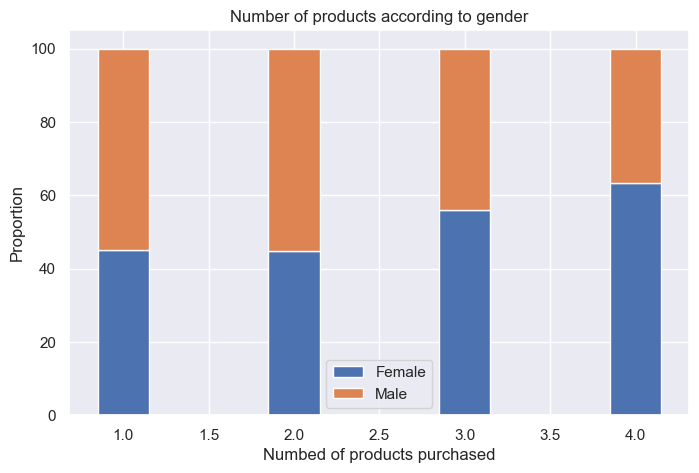

We can see women appear more likely than men to buy more than two products.
However, again, we have to be careful when comparing because there are very few people buying products 3 and 4.


In [300]:
# Numbed of products, Gender
df_prods_gender = (df
      .groupby("NumOfProducts")["Gender"]
      .value_counts(normalize=True)
      .mul(100)
      .round(2)
      .unstack(fill_value=0))

fig, ax = plt.subplots(figsize = (8,5))

ax.bar(df_prods_gender.index, df_prods_gender["Female"], label = 'Female', width = 0.3) 
ax.bar(df_prods_gender.index, df_prods_gender["Male"], bottom = df_prods_gender["Female"], label='Male', width = 0.3)

ax.set(
    title = "Number of products according to gender",
    xlabel = "Numbed of products purchased",
    ylabel = "Proportion"
)
ax.legend()
plt.show()
message = "We can see women appear more likely than men to buy more than two products.\nHowever, again, we have to be careful when comparing because there are very few people buying products 3 and 4."
print(message)

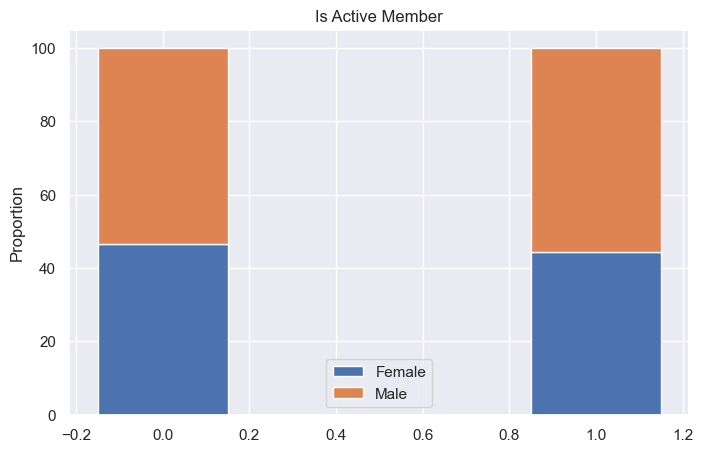

There are no significant gender differences in activity.


In [301]:
# Is active, Gender
df_active_gender = (df
      .groupby("IsActiveMember")["Gender"]
      .value_counts(normalize=True)
      .mul(100)
      .round(2)
      .unstack())

fig, ax = plt.subplots(figsize = (8,5))

ax.bar(df_active_gender.index, df_active_gender["Female"], label = 'Female',  width = 0.3) 
ax.bar(df_active_gender.index, df_active_gender["Male"], bottom = df_active_gender["Female"],  label='Male', width = 0.3)

ax.set(
    title = "Is Active Member",
    xlabel = "",
    ylabel = "Proportion",
)
ax.legend()
plt.show()

message = "There are no significant gender differences in activity."
print(message)

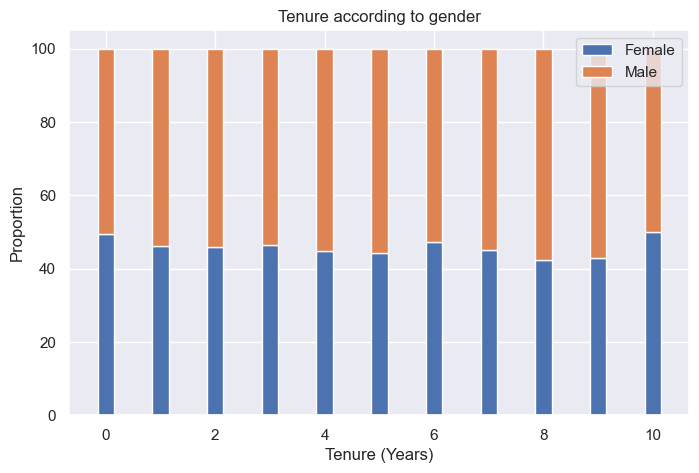

There doesn't seem to be any relation between tenure and gender.


In [302]:
# Tenure, Exited
df_tenure_gender = (df
      .groupby("Tenure")["Gender"]
      .value_counts(normalize=True)
      .mul(100)
      .round(2)
      .unstack())

fig, ax = plt.subplots(figsize = (8,5))

ax.bar(df_tenure_gender.index, df_tenure_gender["Female"], label ="Female", width = 0.3) 
ax.bar(df_tenure_gender.index, df_tenure_gender["Male"], bottom = df_tenure_gender["Female"], label="Male", width = 0.3)

ax.set(
    title = "Tenure according to gender",
    xlabel = "Tenure (Years)",
    ylabel = "Proportion"
)
ax.legend()
plt.show()

message = "There doesn't seem to be any relation between tenure and gender."
print(message)

### Gender patterns in financial variables

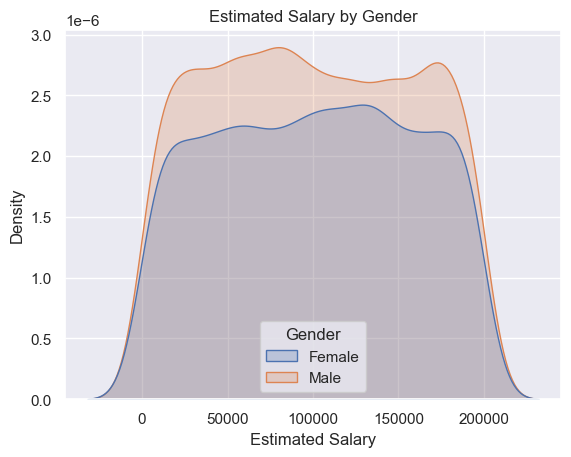

In [303]:
# Estimated Salary, Gender
sns.kdeplot(data=df, x="EstimatedSalary", hue="Gender", fill=True) 
plt.title('Estimated Salary by Gender') 
plt.xlabel('Estimated Salary') 
plt.ylabel('Density') 
plt.show() 

We can see that on average, the estimated salary is lower for women. We also observe differences in the distribution, as the number of men being at around 175k is higher than those being around 130k, whereas for women its the conrtrary. There are less women at the rich end of the distribution with respects to men. 

We now want to observe whether this difference affect other financial variables such as balance or credit score.

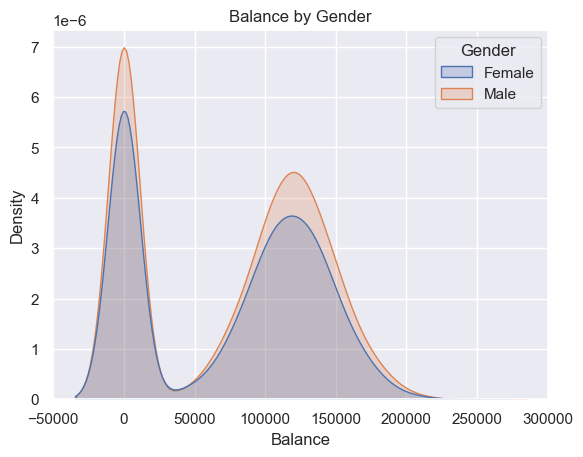

In [304]:
# Balance, Gender
sns.kdeplot(data=df, x="Balance", hue="Gender", fill=True) 
plt.title('Balance by Gender') 
plt.xlabel('Balance') 
plt.ylabel('Density') 
plt.show() 

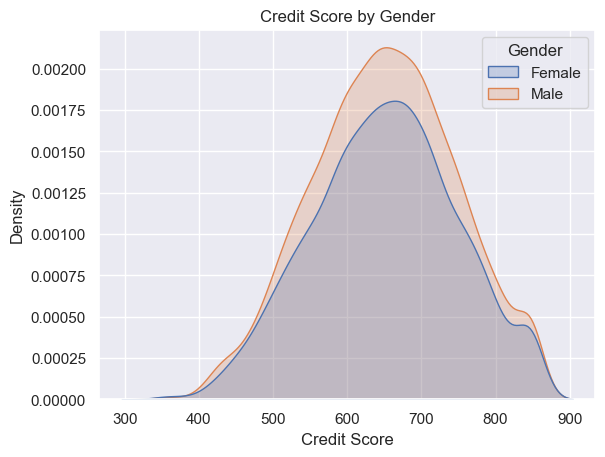

In [305]:
# CreditScore, Gender
sns.kdeplot(data=df, x="CreditScore", hue="Gender", fill=True) 
plt.title('Credit Score by Gender') 
plt.xlabel('Credit Score') 
plt.ylabel('Density') 
plt.show() 

We do not actually observe gender differences in balance or credit score distribution. This coïncides with our previous results of finding no trend linking estimated salary to balance among bank customers.

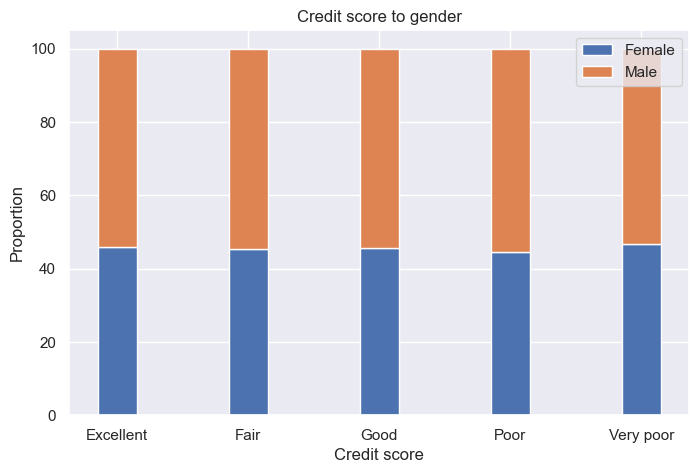

We also do not see any impact of gender differences in salary in the credit score of each gender.


In [306]:
# credit score, Gender
# I do not think we should show this, nor the pie graph representation of each gender 
# The previous chart is the best to show the differences
df_crScore_gender = (df
      .groupby("CreditScoreCategory")["Gender"]
      .value_counts(normalize=True)
      .mul(100)
      .round(2)
      .unstack(fill_value=0))

fig, ax = plt.subplots(figsize = (8,5))

ax.bar(df_crScore_gender.index, df_crScore_gender["Female"], label = 'Female', width = 0.3) 
ax.bar(df_crScore_gender.index, df_crScore_gender["Male"], bottom = df_crScore_gender["Female"], label='Male', width = 0.3)

ax.set(
    title = "Credit score to gender",
    xlabel = "Credit score",
    ylabel = "Proportion"
)
ax.legend()
plt.show()
message = "We also do not see any impact of gender differences in salary in the credit score of each gender."
print(message)

In [307]:
#sns.scatterplot(data=df, x=df["CreditScore"], y=df["Balance"])
#sns.scatterplot(data=df, x=df["EstimatedSalary"], y=df["Balance"])

#Idk if this is the best way to do this, or if its interesting to do, but these variables aren't correlated. 

### Identifying possible activity patterns with financial data

Result: Balance could be an interesting predictor of number of products purchased. People with low balance seem to buy two products more than people with a higher balance. Maybe these products offer clients financial help?

Can estimated salary tell us something?
(spoiler: no.)

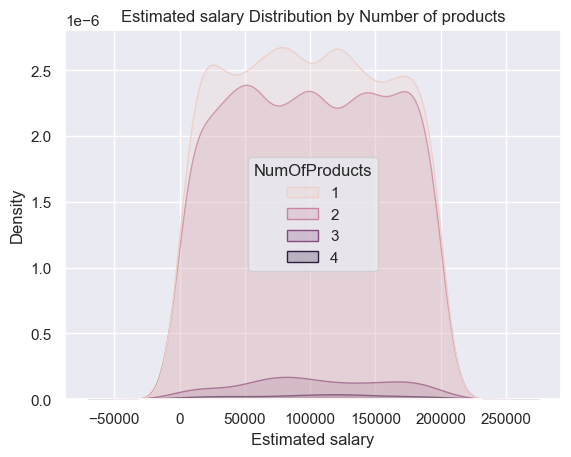

No trend sticks out.  
Again, we could question whether it is even interesting to look at number of products due to the small samples for products 3 and 4.


In [308]:
# Estimated salary and Number of products
sns.kdeplot(data=df, x="EstimatedSalary", hue="NumOfProducts", fill=True) 
plt.title('Estimated salary Distribution by Number of products') 
plt.xlabel('Estimated salary') 
plt.ylabel('Density') 
plt.show() 

message = "No trend sticks out.  \nAgain, we could question whether it is even interesting to look at number of products due to the small samples for products 3 and 4."
print(message)

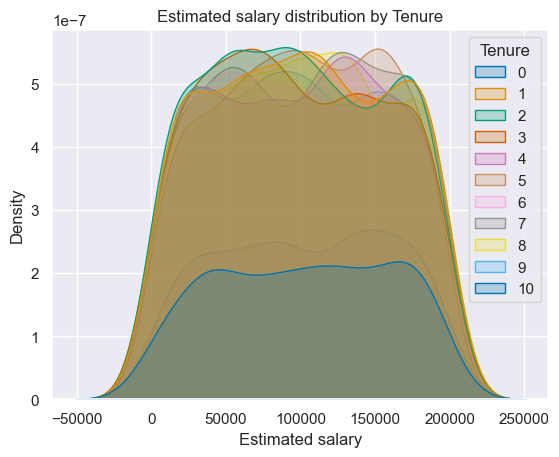

No trends stick out.


In [309]:
# Estimated salary and Tenure
sns.kdeplot(data=df, x="EstimatedSalary", hue="Tenure", 
            palette=sns.color_palette("colorblind", 11), fill=True) 
plt.title('Estimated salary distribution by Tenure') 
plt.xlabel('Estimated salary') 
plt.ylabel('Density') 
plt.show() 

message = "No trends stick out."
print(message)

# Is this the best way to plot this?
# I think we can discard this one: there is no point and indeed no results

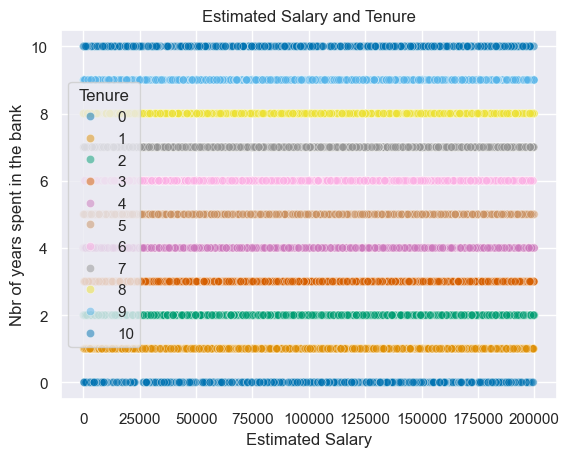

<Figure size 640x480 with 0 Axes>

In [310]:
# Replace the previous plot by this one (From sarah's code)
sns.scatterplot(df, 
             x='EstimatedSalary', 
             y='Tenure', 
             hue = 'Tenure',
             palette= sns.color_palette("colorblind", 11),
             alpha=0.5) 
plt.xlabel('Estimated Salary') 
plt.ylabel('Nbr of years spent in the bank') 
plt.title('Estimated Salary and Tenure') 
plt.show()
plt.tight_layout() 

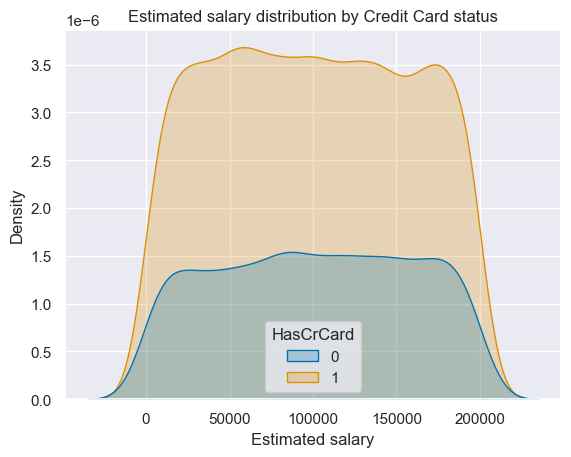

No trends stick out.


In [311]:
# Estimated salary and Credit card
# I dont know how to change label!

sns.kdeplot(data=df, x="EstimatedSalary", hue="HasCrCard", label=["Has a credit card"],
            palette=sns.color_palette("colorblind", 2), fill=True) 
plt.title('Estimated salary distribution by Credit Card status') 
plt.xlabel('Estimated salary') 
plt.ylabel('Density') 
plt.show() 

message = "No trends stick out."
print(message)


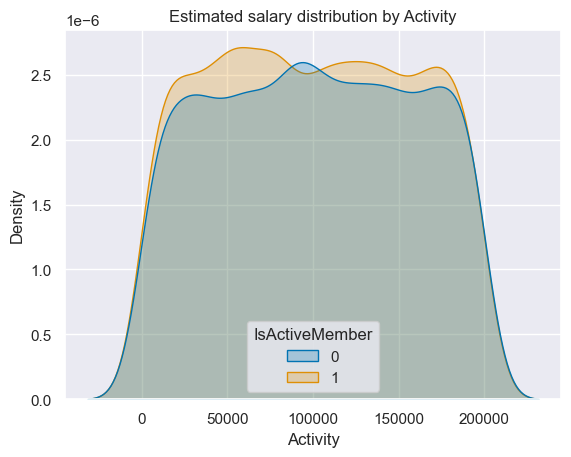

No trends stick out. 
We would have imagined a relationship with estimated salary but it doesnt seem to be a predictor of individual activity


In [312]:
# Estimated salary and Activity

sns.kdeplot(data=df, x="EstimatedSalary", hue="IsActiveMember", label=["No","Yes"],
            # I dont know how to change label
            palette=sns.color_palette("colorblind", 2), fill=True) 
plt.title('Estimated salary distribution by Activity') 
plt.xlabel('Activity') 
plt.ylabel('Density') 
plt.show() 

message = "No trends stick out. \nWe would have imagined a relationship with estimated salary but it doesnt seem to be a predictor of individual activity"
print(message)

### Can balance tell us something?

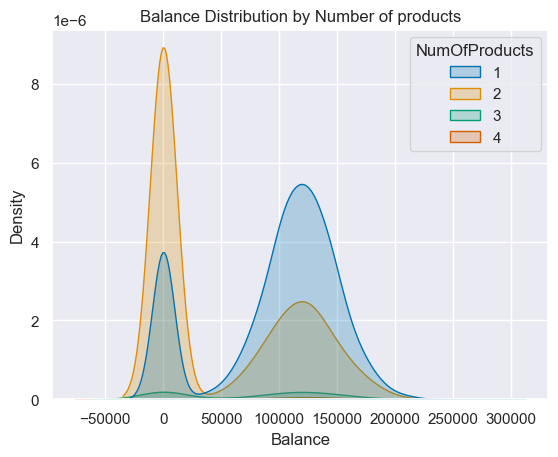

In [313]:
# Balance and Number of products
sns.kdeplot(data=df, x="Balance", hue="NumOfProducts",
            palette=sns.color_palette("colorblind", 4), fill=True) 
plt.title('Balance Distribution by Number of products') 
plt.xlabel('Balance') 
plt.ylabel('Density') 
plt.show() 

We see that people with a balance close to zero actually seem much more prone to buy two products than people with a higher balance, who in their majority only buy 1 product. We wonder if these products might be advantageous particularly to people with low balance, such as borrowing allowances and other possibilities. 

No other trends stick out linking balance and activity variables (see annex).

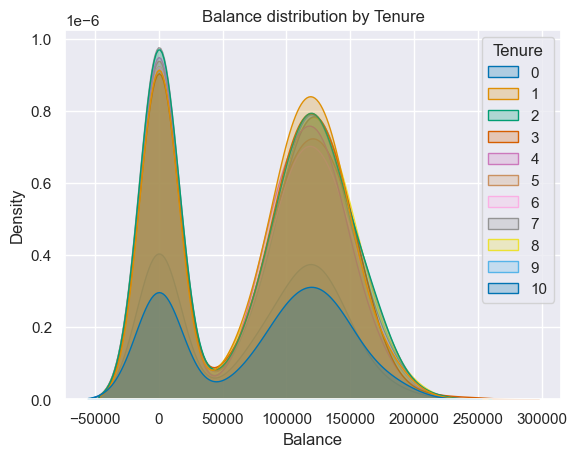

No distributional trends stick out.


In [314]:
# Balance and Tenure
# graoh to be replaced with the next one (better representation)
sns.kdeplot(data=df, x="Balance", hue="Tenure", 
            palette=sns.color_palette("colorblind", 11), fill=True) 
plt.title('Balance distribution by Tenure') 
plt.xlabel('Balance') 
plt.ylabel('Density') 
plt.show() 

message = "No distributional trends stick out."
print(message)

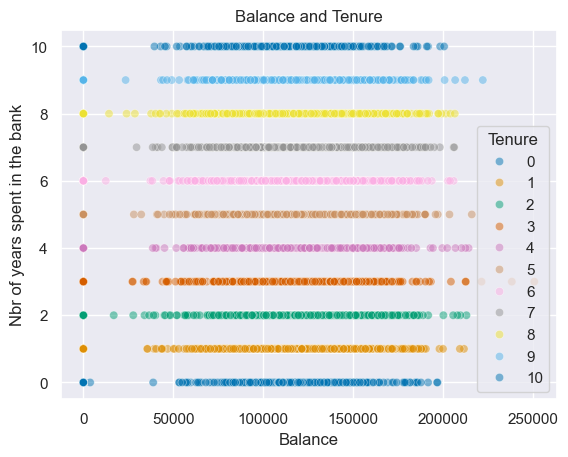

<Figure size 640x480 with 0 Axes>

In [315]:
# Replace the previous plot by this one (From sarah's code)
sns.scatterplot(df, 
             x='Balance', 
             y='Tenure', 
             hue = 'Tenure',
             palette= sns.color_palette("colorblind", 11),
             alpha=0.5) 
plt.xlabel('Balance') 
plt.ylabel('Nbr of years spent in the bank') 
plt.title('Balance and Tenure') 
plt.show()
plt.tight_layout() 

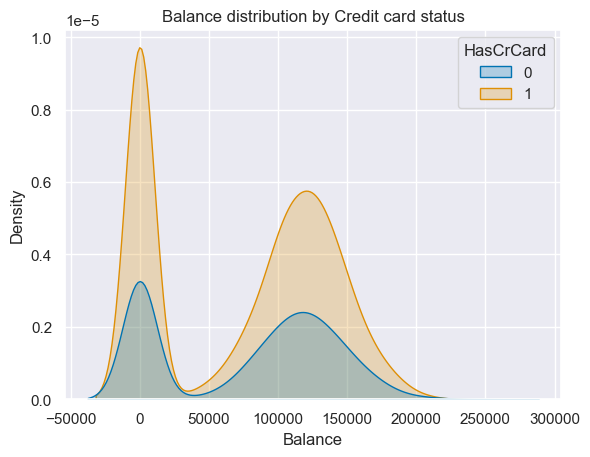

In [316]:
# Balance and Credit card

sns.kdeplot(data=df, x="Balance", hue="HasCrCard", label=["No","Yes"],
            # I dont know how to change label
            palette=sns.color_palette("colorblind", 2), fill=True) 
plt.title('Balance distribution by Credit card status') 
plt.xlabel('Balance') 
plt.ylabel('Density') 
plt.show() 

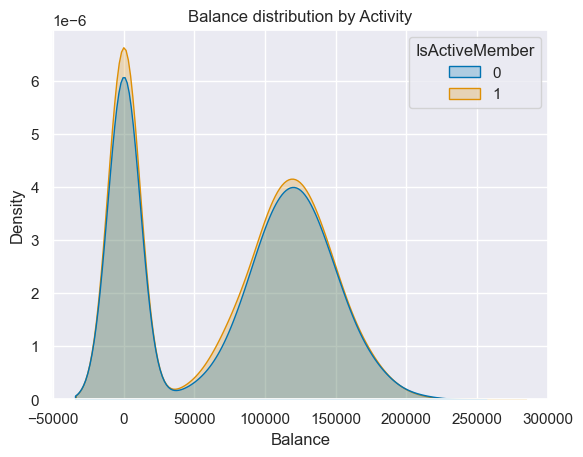

In [317]:
# Balance and Activity

sns.kdeplot(data=df, x="Balance", hue="IsActiveMember", label=["No","Yes"],
            # I dont know how to change label
            palette=sns.color_palette("colorblind", 2), fill=True) 
plt.title('Balance distribution by Activity') 
plt.xlabel('Balance') 
plt.ylabel('Density') 
plt.show() 

### Credit score and activity variables 
We also do not observe any correlation between the credit score of customers and activity variables (see annex). 

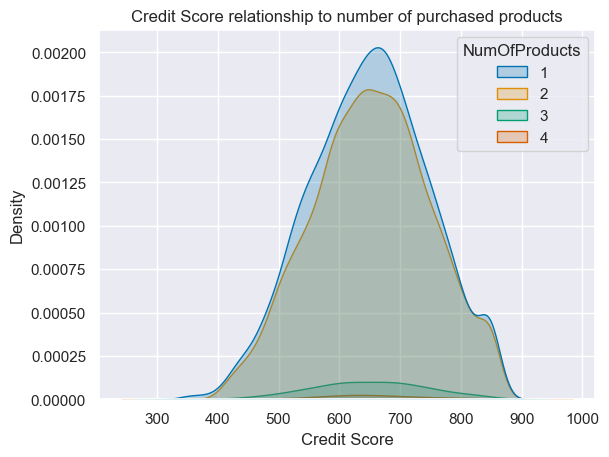

In [318]:
# credit score and Number of products
sns.kdeplot(data=df, x="CreditScore", hue="NumOfProducts",
            palette=sns.color_palette("colorblind", 4), fill=True) 
plt.title('Credit Score relationship to number of purchased products') 
plt.xlabel('Credit Score') 
plt.ylabel('Density') 
plt.show() 

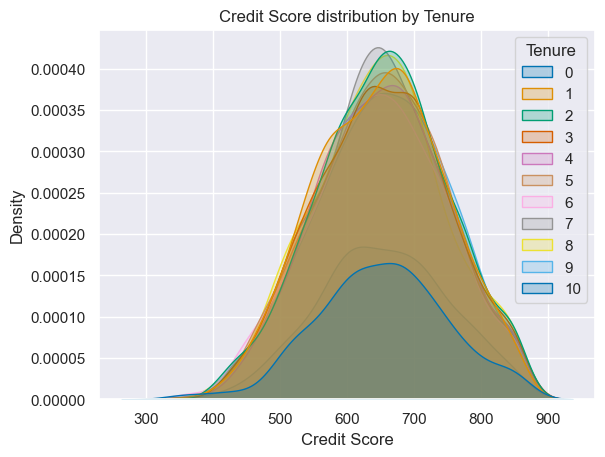

In [319]:
# Credit Score and Tenure
sns.kdeplot(data=df, x="CreditScore", hue="Tenure", 
            palette=sns.color_palette("colorblind", 11), fill=True) 
plt.title('Credit Score distribution by Tenure') 
plt.xlabel('Credit Score') 
plt.ylabel('Density') 
plt.show() 

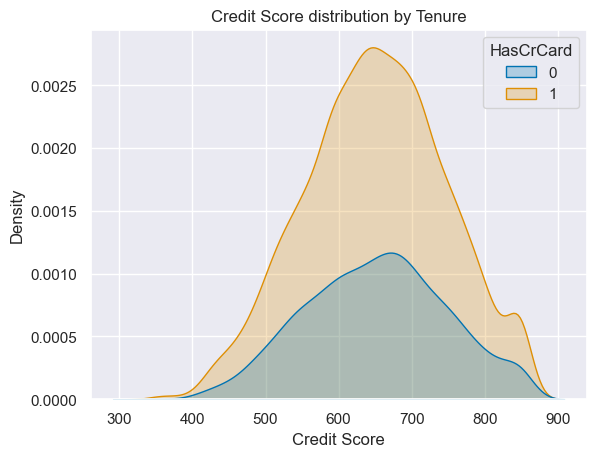

In [320]:
# Credit Score and Credit card

sns.kdeplot(data=df, x="CreditScore", hue="HasCrCard", label=["No","Yes"],
            # I dont know how to change label
            palette=sns.color_palette("colorblind", 2), fill=True) 
plt.title('Credit Score distribution by Tenure') 
plt.xlabel('Credit Score') 
plt.ylabel('Density') 
plt.show() 

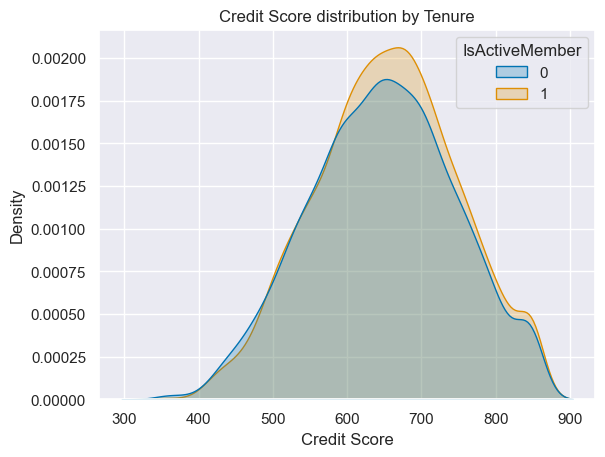

In [321]:
# Credit Score and Activity

sns.kdeplot(data=df, x="CreditScore", hue="IsActiveMember", label=["No","Yes"],
            # I dont know how to change label
            palette=sns.color_palette("colorblind", 2), fill=True) 
plt.title('Credit Score distribution by Tenure') 
plt.xlabel('Credit Score') 
plt.ylabel('Density') 
plt.show() 

### Geographic trends: How is Germany an exception?

- Balance: interesting
- No other trends in geography with credit card, number of products, Credit score (TO PUT IN ANNEX)

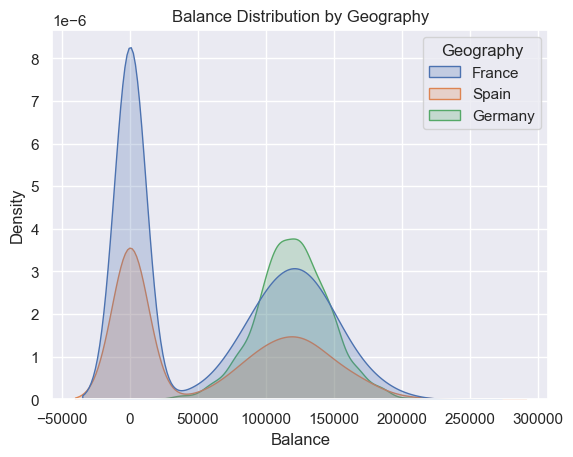

Germany doesn't seem to have low balances!


In [322]:
# Quick look how does Balance interact with Geography - and therefore after how is it interacting with churn ?

sns.kdeplot(data=df, x="Balance", hue="Geography", fill=True) 
plt.title('Balance Distribution by Geography') 
plt.xlabel('Balance') 
plt.ylabel('Density') 
plt.show() 

message ="Germany doesn't seem to have low balances!"
print(message)

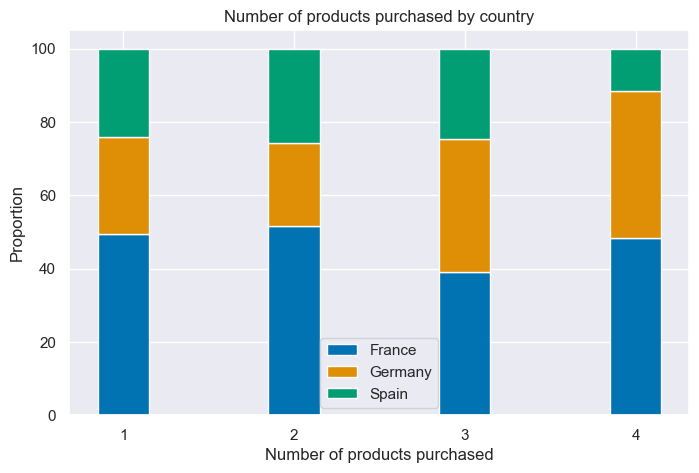

 No trends.


In [335]:
# Number of products, Geography
df_products_geography = (df
      .groupby("NumOfProducts")["Geography"]
      .value_counts(normalize=True)
      .mul(100)
      .round(2)
      .unstack(fill_value=0))

colorblind_colors = sns.color_palette("colorblind")
fig, ax = plt.subplots(figsize = (8,5))

ax.bar(df_products_geography.index, df_products_geography["France"], label = 'France', tick_label = ["1","2","3","4"], width = 0.3, color=colorblind_colors[0]) 
ax.bar(df_products_geography.index, df_products_geography["Germany"], bottom = df_products_geography["France"], label='Germany', width = 0.3, color=colorblind_colors[1])
ax.bar(df_products_geography.index, df_products_geography["Spain"], bottom = (df_products_geography["Germany"]+df_products_geography["France"]), label='Spain', width = 0.3, color=colorblind_colors[2])

ax.set(
    title = "Number of products purchased by country",
    xlabel = "Number of products purchased",
    ylabel = "Proportion"
)
ax.legend()
plt.show()


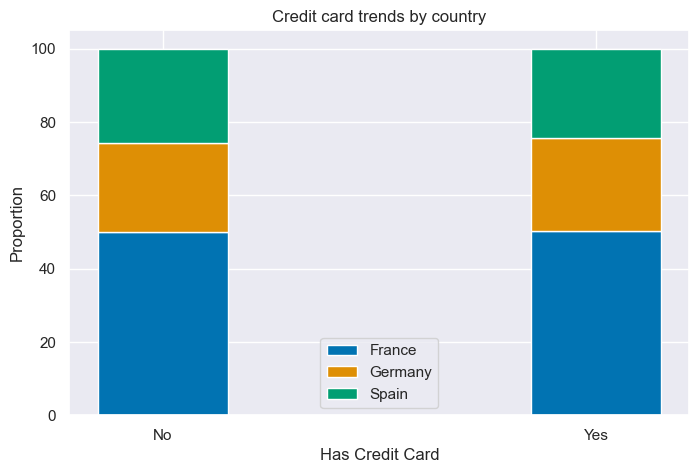

 No trends.


In [336]:
# Has credit card, Geography
df_products_geography = (df
      .groupby("HasCrCard")["Geography"]
      .value_counts(normalize=True)
      .mul(100)
      .round(2)
      .unstack(fill_value=0))

colorblind_colors = sns.color_palette("colorblind")
fig, ax = plt.subplots(figsize = (8,5))

ax.bar(df_products_geography.index, df_products_geography["France"], label = 'France', tick_label = ["No", "Yes"], width = 0.3, color=colorblind_colors[0]) 
ax.bar(df_products_geography.index, df_products_geography["Germany"], bottom = df_products_geography["France"], label='Germany', width = 0.3, color=colorblind_colors[1])
ax.bar(df_products_geography.index, df_products_geography["Spain"], bottom = (df_products_geography["Germany"]+df_products_geography["France"]), label='Spain', width = 0.3, color=colorblind_colors[2])


ax.set(
    title = "Credit card trends by country",
    xlabel = "Has Credit Card",
    ylabel = "Proportion"
)
ax.legend()
plt.show()

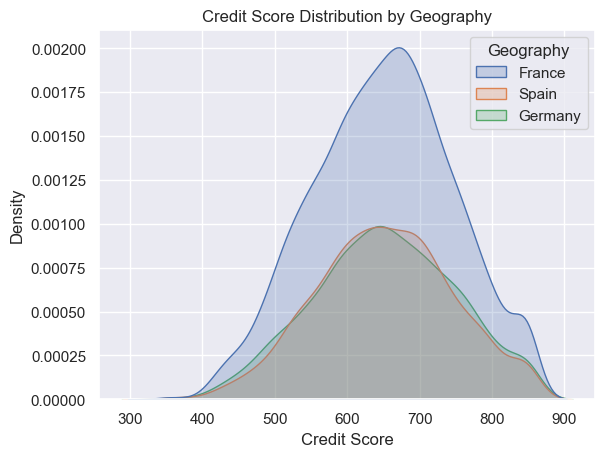

No trends.


In [325]:
# Credit score and geography

sns.kdeplot(data=df, x="CreditScore", hue="Geography", fill=True) 
plt.title('Credit Score Distribution by Geography') 
plt.xlabel('Credit Score') 
plt.ylabel('Density') 
plt.show() 

message ="No trends."
print(message)